In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from MuC.detgeo import SimulateDetector#, che, plot_sim
from MuC import detgeo as dg
from MuC import musim
import pickle

In [16]:
tex_labels = {}
tex_labels['e'] = r'e'
tex_labels['m'] = r'\mu'
tex_labels['l'] = r'\tau'
from DarkNews import plot_tools as pt


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_19600/4106696.py:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xsec[0], xsec[1]/xsec[0],'-', lw=1.5, label=label, color=c, ls=(1,(2,0.5)))


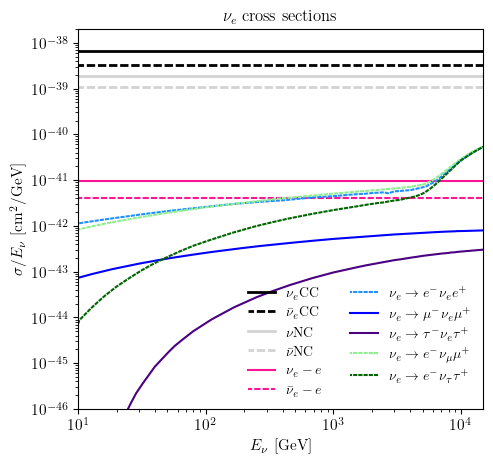

In [53]:
fig, ax = pt.std_fig(figsize=(5, 5))
# ax = fig.add_axes([0.145, 0.12, 0.82, 0.82 ])
ax.set_xscale('log'); ax.set_yscale('log')

E = np.logspace(1, 5, 100)
ax.plot(E, 0.66e-38*E/E, ls='-', label=r'$\nu_e$CC', c='black', lw=2)
ax.plot(E, 0.33e-38*E/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC', c='black', lw=2)


ax.plot(E, 0.289*0.66e-38*E/E, ls='-', label=r'$\nu$NC', c='lightgrey', lw=2)
ax.plot(E, 0.329*0.33e-38*E/E, ls=(1,(3,1)), label=r'$\bar\nu$NC', c='lightgrey', lw=2)
# ax.plot(E, 1e-38*E/E, ls='-', label=r'$\nu_e$CC', c='black')


ax.plot(E, total_cross_section(E, nuf='e', anu=False)/E, ls='-', label=r'$\nu_e - e$', c='deeppink')
# ax.plot(E, total_cross_section(E, nuf='m', anu=False)/E, ls='--')
ax.plot(E, total_cross_section(E, nuf='e', anu=True)/E, ls=(1,(3,1)), label=r'$\bar\nu_e - e$', c='deeppink')
# ax.plot(E, total_cross_section(E, nuf='m', anu=True)/E, ls='--')


flavors = ['e','m','l']
targets = ['O16']
colors = iter(['dodgerblue', 'blue', 'indigo', 'lightgreen', 'darkgreen', 'darkgreen'])
for target in targets:
    for nui in flavors:
        for nuf in flavors:
            for minus_lep in flavors:
                for plus_lep in flavors:
                    if not nui == 'l' and not nui == 'm':
                        try:                
                            xsec = np.loadtxt(f'rare_xsecs/trident_production/v{nui}{target}TOv{nuf}{minus_lep}{plus_lep.capitalize()}X_tot.dat').T
                            label = fr'$\nu_{tex_labels[nui]} \to {tex_labels[minus_lep]}^- \nu_{tex_labels[nuf]} {tex_labels[plus_lep]}^+$'
                        except FileNotFoundError:
                            try:
                                xsec = np.loadtxt(f'rare_xsecs/trident_production/v{nui}{target}TO{minus_lep}v{nuf}{plus_lep.capitalize()}X_tot.dat').T
                                label = fr'$\nu_{tex_labels[nui]} \to {tex_labels[minus_lep]}^-\nu_{tex_labels[nuf]} {tex_labels[plus_lep]}^+$'
                            except FileNotFoundError:
                                continue
                        c = next(colors)
                        if minus_lep == 'e':
                            ax.plot(xsec[0], xsec[1]/xsec[0],'-', lw=1.5, label=label, color=c, ls=(1,(2,0.5)))
                        else:
                            ax.plot(xsec[0], xsec[1]/xsec[0],'-', lw=1.5, label=label, color=c)
ax.set_xlim(1e1, 15e3)
ax.set_ylim(1e-46, 2e-38)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel(r'$\sigma/E_\nu$ [cm$^2$/GeV]')
ax.set_title(r'$\nu_e$ cross sections')


ax.legend(loc='lower right', ncol=2)
fig.savefig('plots/paper_plots/cross_sections.pdf', bbox_inches='tight')

[]

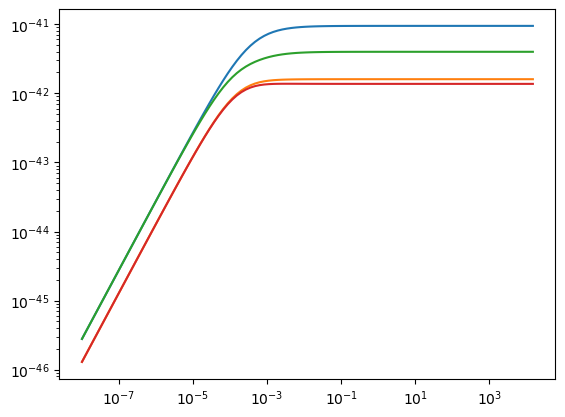

In [74]:
E = np.geomspace(1e-8, 15e3, 100)
plt.plot(E, total_cross_section(E, nuf='e', anu=False)/E)
plt.plot(E, total_cross_section(E, nuf='m', anu=False)/E)

plt.plot(E, total_cross_section(E, nuf='e', anu=True)/E)
plt.plot(E, total_cross_section(E, nuf='m', anu=True)/E)

plt.loglog()